In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, linear_model, model_selection, metrics
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
life_data = pd.read_csv("Life_Expectancy_Data.csv")
life_data
# reading the file, we find that the dataset has 2938 rows and 22 columns of data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [ ]:
#By checking the number of non null data points in the features, we can see that the dataset seems to have
#some null points(missing values) for every feature except country, year and status infant deaths, percentage expenditure, Measles, under-five deaths and HIV/AIDS.

In [4]:
life_data.describe(include='all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,New Zealand,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


In [ ]:
#We can see from the above that the dataset contains information from 193 different countries during the years 2000 to 2015
#status column seems to have only two unique values

In [5]:
###dropping the null points so that there will be no missing values
life_data = life_data.dropna(axis=0)


In [6]:
life_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
Country                            1649 non-null object
Year                               1649 non-null int64
Status                             1649 non-null object
Life expectancy                    1649 non-null float64
Adult Mortality                    1649 non-null float64
infant deaths                      1649 non-null int64
Alcohol                            1649 non-null float64
percentage expenditure             1649 non-null float64
Hepatitis B                        1649 non-null float64
Measles                            1649 non-null int64
 BMI                               1649 non-null float64
under-five deaths                  1649 non-null int64
Polio                              1649 non-null float64
Total expenditure                  1649 non-null float64
Diphtheria                         1649 non-null float64
 HIV/AIDS                          1649 non-null

In [7]:
#at this point it is probably a good idea to use smaller numbers to represent population
life_data['Population'] = life_data['Population']/1000000
life_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33.736494,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,0.327582,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31.731688,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3.696958,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2.978599,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12.777511,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12.633897,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,0.125525,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12.366165,1.6,1.7,0.427,9.8


In [8]:
life_data.columns #checking columns in dataset

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
life_data.columns.values[17] ="Population(in Millions)" #changing "population" to "population in millions" to reflect the previous conversion
life_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population(in Millions),thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33.736494,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,0.327582,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31.731688,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3.696958,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2.978599,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12.777511,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12.633897,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,0.125525,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12.366165,1.6,1.7,0.427,9.8


In [10]:
#Let's try and look at a particular counry
Nigeria =life_data[life_data['Country'] == 'Nigeria']
Nigeria

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population(in Millions),thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1894,Nigeria,2014,Developing,53.6,362.0,490,0.01,263.211103,49.0,6855,...,49.0,3.67,49.0,3.9,3221.678128,1.764652,1.1,9.9,0.521,10.0
1895,Nigeria,2013,Developing,53.2,367.0,498,8.30,194.203288,46.0,52852,...,46.0,3.70,46.0,3.9,2996.964320,17.182933,1.4,1.2,0.514,9.8
1896,Nigeria,2012,Developing,52.7,374.0,505,8.54,204.718626,42.0,6447,...,42.0,3.30,42.0,4.4,2755.297787,167.297284,1.7,1.6,0.507,9.7
1897,Nigeria,2011,Developing,52.3,375.0,513,8.75,187.573319,46.0,18843,...,48.0,3.69,48.0,4.7,2527.942300,16.287776,11.0,1.9,0.500,9.6
1898,Nigeria,2010,Developing,52.0,374.0,521,8.90,133.123087,49.0,8491,...,54.0,3.47,54.0,4.8,2327.326700,158.578261,11.3,11.2,0.492,9.5
1899,Nigeria,2009,Developing,51.6,376.0,527,9.05,14.567647,63.0,1272,...,66.0,4.24,63.0,4.9,197.661422,15.442181,11.7,11.6,0.487,9.3
1900,Nigeria,2008,Developing,59.0,386.0,536,9.30,105.591063,41.0,9960,...,6.0,4.00,53.0,5.0,1383.893354,1.534739,12.0,11.9,0.481,9.2
1901,Nigeria,2007,Developing,55.0,388.0,542,9.55,104.474644,42.0,2613,...,54.0,4.47,42.0,5.2,1136.829645,14.641724,12.3,12.3,0.477,9.1
1902,Nigeria,2006,Developing,49.8,396.0,549,9.66,10.357794,27.0,704,...,46.0,3.66,4.0,5.3,119.743286,14.261494,12.6,12.6,0.466,9.0
1903,Nigeria,2005,Developing,49.2,4.0,556,9.71,6.416253,18.0,110927,...,45.0,4.11,36.0,5.4,87.893874,138.939478,12.9,12.9,0.463,8.9


In [14]:
India = life_data[life_data['Country'] == 'India']
India

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population(in Millions),thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1187,India,2014,Developing,68.0,184.0,957,3.07,86.521539,79.0,79563,...,84.0,4.69,85.0,0.2,1573.118890,1293.859294,26.8,27.4,0.607,11.6
1188,India,2013,Developing,67.6,187.0,1000,3.11,67.672304,7.0,13822,...,82.0,4.53,83.0,0.2,1452.195373,127.856227,26.8,27.5,0.599,11.5
1189,India,2012,Developing,67.3,19.0,1100,3.10,64.969645,73.0,18668,...,79.0,4.39,82.0,0.2,1446.985410,126.365852,26.9,27.6,0.590,11.3
1190,India,2011,Developing,66.8,193.0,1100,3.00,64.605901,44.0,33634,...,79.0,4.33,82.0,0.2,1461.671957,124.723629,26.9,27.7,0.580,10.8
1191,India,2010,Developing,66.4,196.0,1200,2.77,57.733599,38.0,31458,...,76.0,4.28,79.0,0.2,1345.771530,12.398691,27.0,27.8,0.569,10.4
1192,India,2009,Developing,66.0,2.0,1300,2.50,0.844186,37.0,56188,...,73.0,4.38,74.0,0.2,19.317765,121.427132,27.0,27.8,0.563,10.5
1193,India,2008,Developing,65.5,23.0,1300,1.93,43.030433,29.0,44258,...,69.0,4.34,7.0,0.3,991.484634,119.714696,27.0,27.9,0.556,10.2
1194,India,2007,Developing,65.2,26.0,1400,1.59,5.234770,6.0,41144,...,67.0,4.23,64.0,0.3,118.166373,1179.681239,27.1,28.0,0.546,9.9
1195,India,2006,Developing,64.8,28.0,1500,1.37,34.859427,6.0,64185,...,66.0,4.25,65.0,0.3,792.259698,1161.977719,27.1,28.0,0.536,9.7
1196,India,2005,Developing,64.4,211.0,1500,1.27,3.509637,8.0,36711,...,65.0,4.28,65.0,0.3,77.819000,1144.118674,27.2,28.1,0.526,9.4


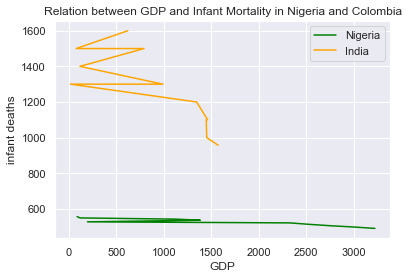

In [16]:
plt.plot(Nigeria['GDP'], Nigeria['infant deaths'], color='green', label = 'Nigeria')
plt.plot(India['GDP'], India['infant deaths'], color='orange', label = 'India')
plt.xlabel('GDP')
plt.ylabel('infant deaths')
plt.title("Relation between GDP and Infant Mortality in Nigeria and Colombia")
plt.legend()
plt.show()

In [ ]:
#We can see that the number of Infant deaths gradually increases the higher the country's GDP.... This may suggest to us that
#the wealthier a country gets across the board the more it is able to put in the health sector and therefore increase
#standard of living

In [17]:
life_data['Status'].value_counts()

Developing    1407
Developed      242
Name: Status, dtype: int64

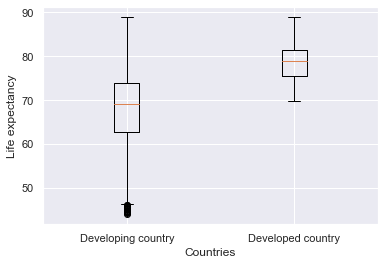

In [18]:
plt.boxplot([life_data[life_data['Status']=='Developing']['Life expectancy '], life_data[life_data['Status']=='Developed']['Life expectancy ']], labels=['Developing country','Developed country'])
plt.ylabel('Life expectancy')
plt.xlabel('Countries')
plt.show()

In [ ]:
##The above seems to ratify our suspicion that wealthier countries are able to facilitate higher standerds of living
#The box plot show the median life expectancy for developed vs developing countries, the developed countries having the
#higher standard of living.

In [19]:
life_data.sort_values("infant deaths")

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population(in Millions),thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1542,Luxembourg,2011,Developed,88.0,72.0,0,11.50,17028.527980,95.0,6,...,96.0,7.34,99.0,0.1,115761.577000,0.518347,0.9,0.9,0.894,13.9
1111,Guyana,2010,Developing,65.9,221.0,0,7.52,48.028594,95.0,0,...,95.0,6.60,95.0,0.4,326.281212,0.746556,5.6,5.3,0.618,10.2
1112,Guyana,2009,Developing,66.1,218.0,0,7.49,466.669370,98.0,0,...,97.0,7.32,98.0,0.3,2716.352560,0.745693,5.6,5.4,0.618,10.5
2229,Sao Tome and Principe,2003,Developing,63.4,225.0,0,6.54,86.427441,43.0,0,...,94.0,11.12,94.0,1.6,649.342153,0.148372,7.4,7.4,0.504,9.7
2228,Sao Tome and Principe,2004,Developing,63.8,224.0,0,5.78,9.013494,7.0,0,...,99.0,9.94,96.0,1.6,693.345683,0.151969,7.2,7.2,0.509,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,India,2008,Developing,65.5,23.0,1300,1.93,43.030433,29.0,44258,...,69.0,4.34,7.0,0.3,991.484634,119.714696,27.0,27.9,0.556,10.2
1194,India,2007,Developing,65.2,26.0,1400,1.59,5.234770,6.0,41144,...,67.0,4.23,64.0,0.3,118.166373,1179.681239,27.1,28.0,0.546,9.9
1195,India,2006,Developing,64.8,28.0,1500,1.37,34.859427,6.0,64185,...,66.0,4.25,65.0,0.3,792.259698,1161.977719,27.1,28.0,0.536,9.7
1196,India,2005,Developing,64.4,211.0,1500,1.27,3.509637,8.0,36711,...,65.0,4.28,65.0,0.3,77.819000,1144.118674,27.2,28.1,0.526,9.4


In [ ]:
##The above shows that a higher life expectancy does not always mean low infant mortality, in 2008 India had a life expectancy
#of 65.5 but had 1300 infant deaths, while in 2003 Sao Tompe and Principe had a life expectancy of 63.4 and had 0 infant deaths.
#Let's investigate the relationship between GDP and Life expectancy

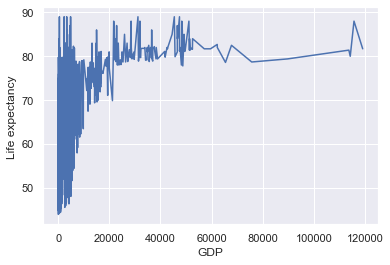

In [20]:
sns.lineplot(life_data['GDP'], life_data['Life expectancy '])
plt.show()

In [ ]:
##Life expectancy seems to increase as GDP increases

In [21]:
cat_vars= life_data.columns[life_data.dtypes=='object']
print(cat_vars)##Since status and country columns are object types, we should convert to numbers

Index(['Country', 'Status'], dtype='object')


In [22]:
life_data.loc[:, 'Country'] = pd.factorize(life_data.loc[:, 'Country'], sort=True)[0]
life_data['Country'].value_counts()

0      16
1      16
65     15
48     15
54     15
       ..
86      5
88      4
115     4
53      2
38      1
Name: Country, Length: 133, dtype: int64

In [23]:
life_data.loc[:, 'Status'] = pd.factorize(life_data.loc[:, 'Status'], sort=True)[0]
life_data['Status'].value_counts()

1    1407
0     242
Name: Status, dtype: int64

In [24]:
life_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population(in Millions),thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33.736494,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,0.327582,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31.731688,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3.696958,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2.978599,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,132,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12.777511,9.4,9.4,0.407,9.2
2934,132,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12.633897,9.8,9.9,0.418,9.5
2935,132,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,0.125525,1.2,1.3,0.427,10.0
2936,132,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12.366165,1.6,1.7,0.427,9.8


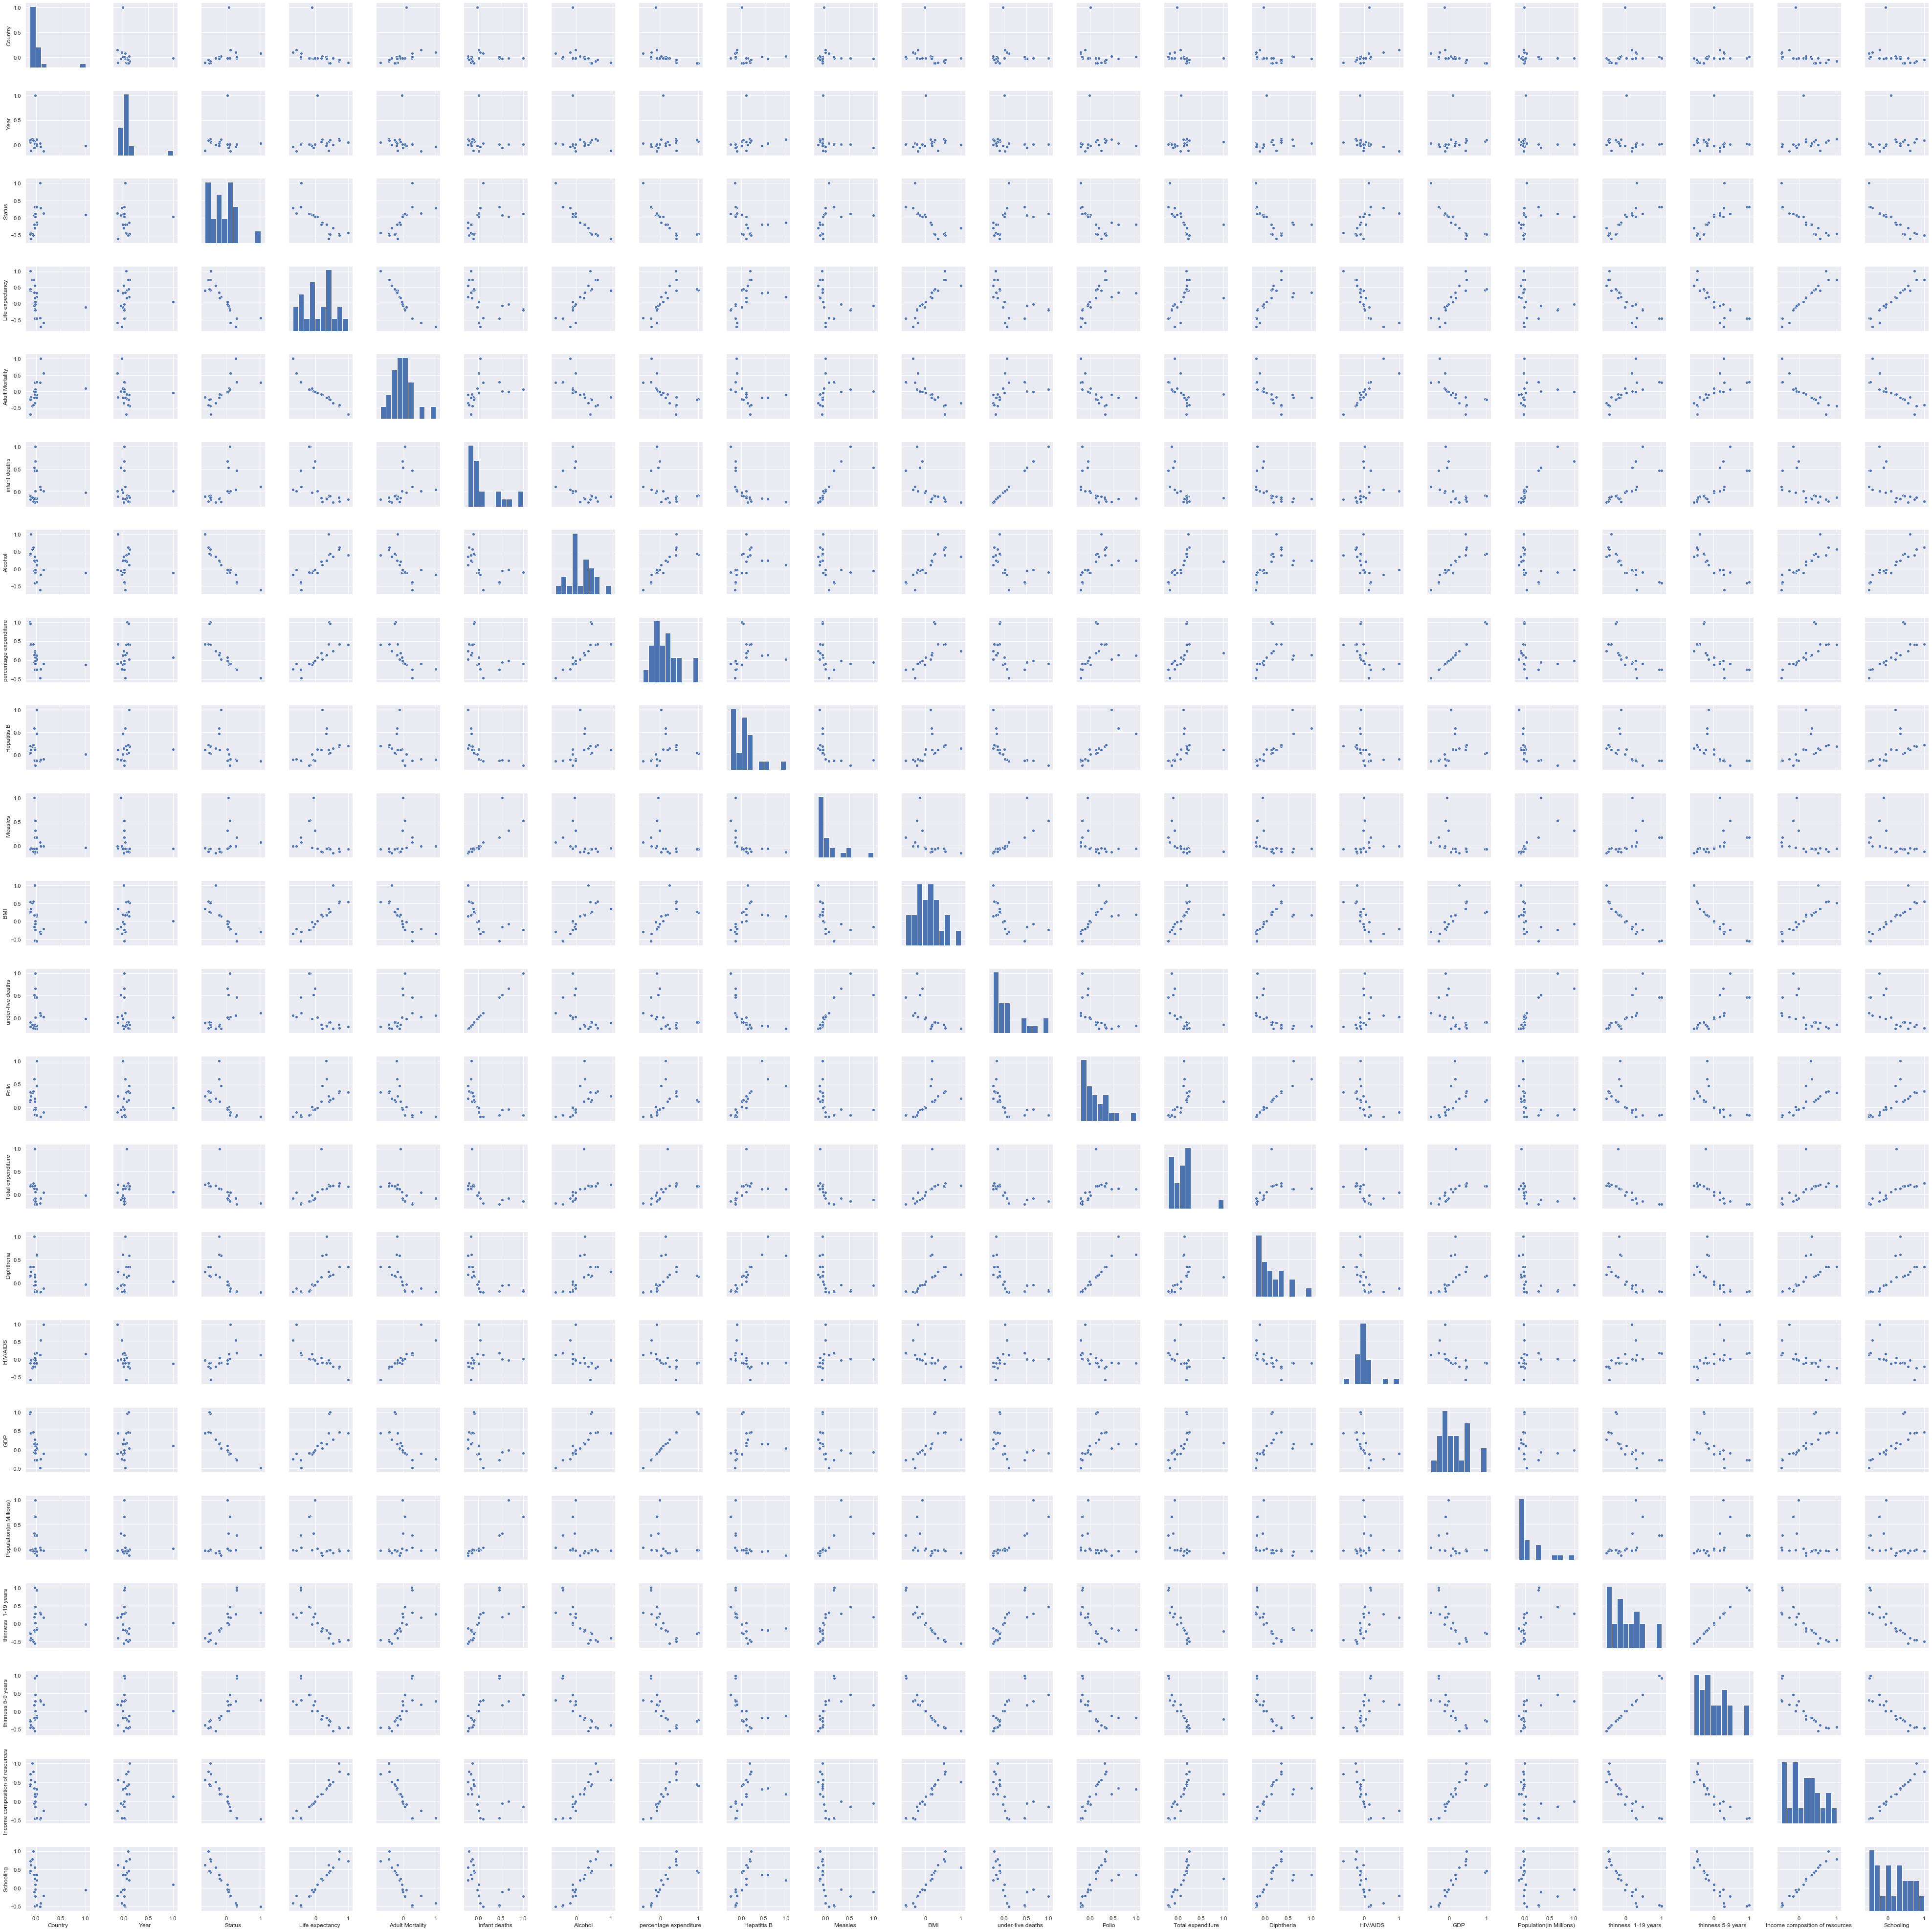

In [25]:
sns.pairplot(life_data.corr()) ##The pairplot doesn't give us a good way to view correlation, let's try heatmap

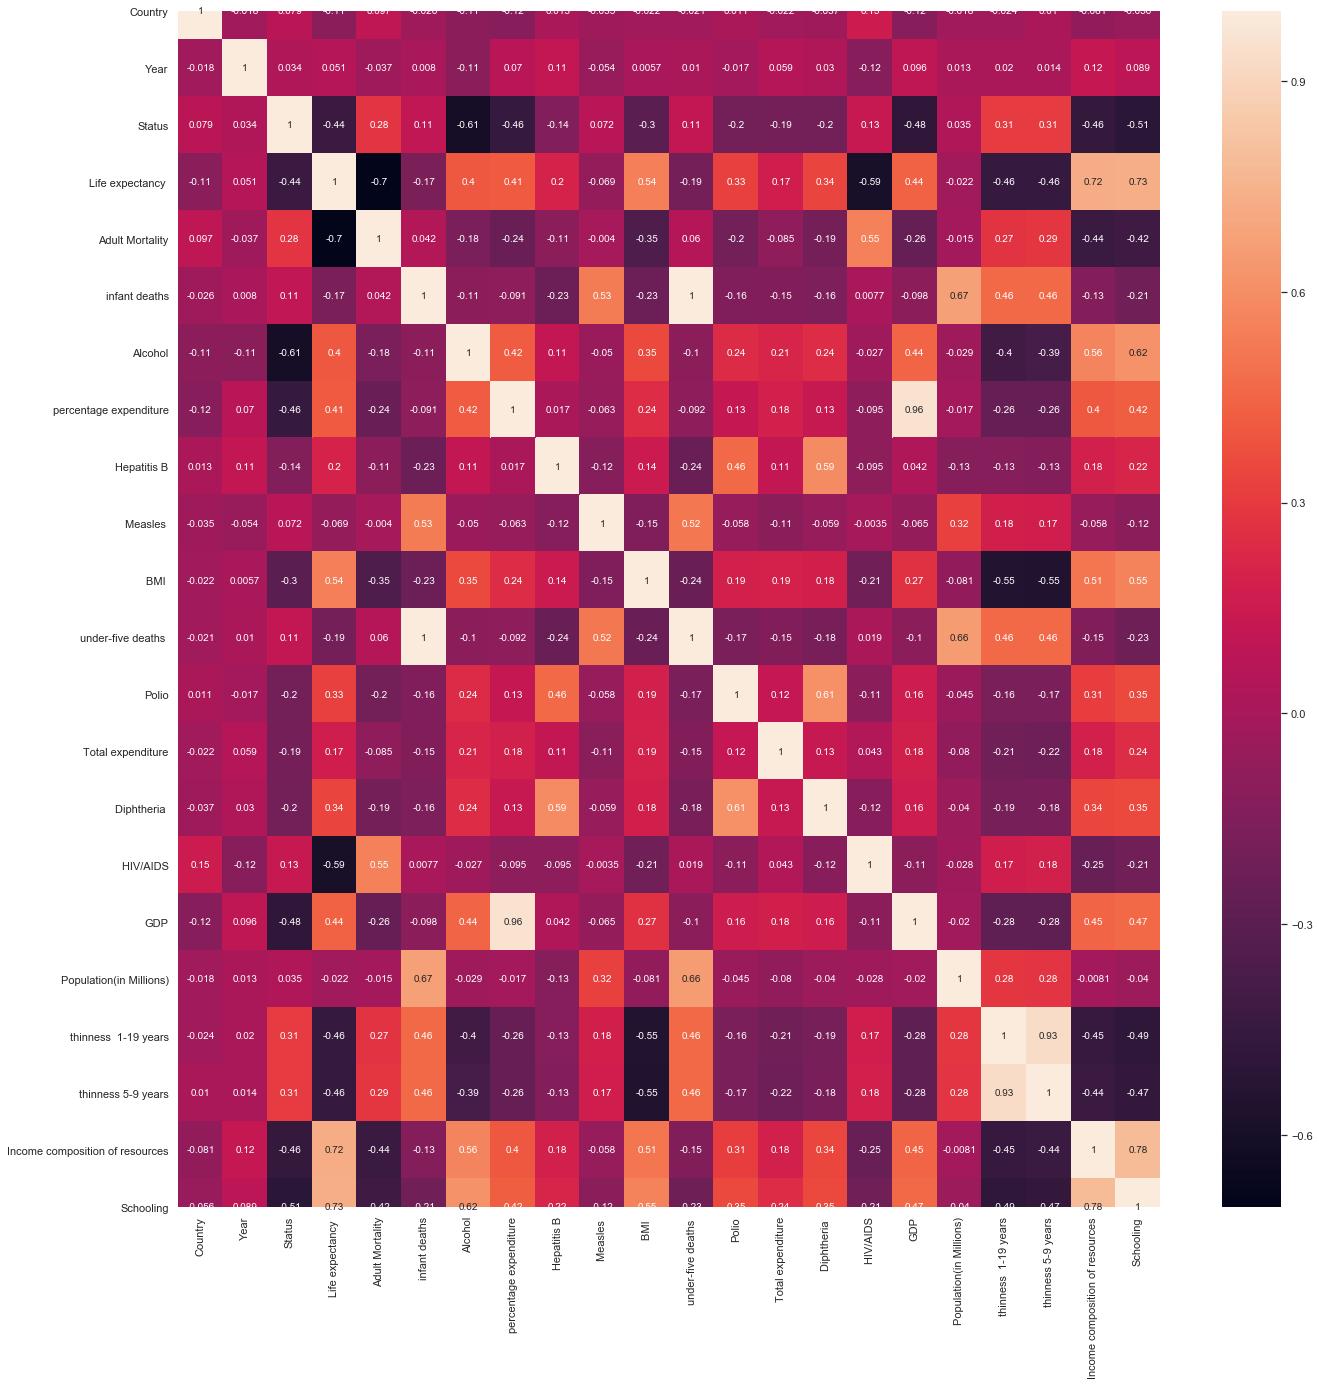

In [26]:
fig, ax = plt.subplots(figsize=(22,22)) 
sns.heatmap(life_data.corr(), annot=True, ax=ax)
plt.show()

In [ ]:
#From this we can see that alot of the features of the dataset have alot of correlation, GDP and percentage expenditure
#have high correlation, thinness 5-9 has high correlation with thinness 1-19, Income compositions of resources has a significant
#but not high correlation with schooling, infant deaths has a high correlation with under five deaths, so we may want to
#drop a few of these highly correlated feautures from the dataset

In [27]:
life_data.columns.values[17] ="Population" #changing population in millions back to population because it was causing problems
#when dropping columns in the dataset(it would return NaN values for population)

In [28]:
life_data1 =life_data.drop(axis=1, columns=[ ' thinness 5-9 years', 'Income composition of resources',
                'percentage expenditure', 'under-five deaths '])
life_data1

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Schooling
0,0,2015,1,65.0,263.0,62,0.01,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33.736494,17.2,10.1
1,0,2014,1,59.9,271.0,64,0.01,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,0.327582,17.5,10.0
2,0,2013,1,59.9,268.0,66,0.01,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31.731688,17.7,9.9
3,0,2012,1,59.5,272.0,69,0.01,67.0,2787,17.6,67.0,8.52,67.0,0.1,669.959000,3.696958,17.9,9.8
4,0,2011,1,59.2,275.0,71,0.01,68.0,3013,17.2,68.0,7.87,68.0,0.1,63.537231,2.978599,18.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,132,2004,1,44.3,723.0,27,4.36,68.0,31,27.1,67.0,7.13,65.0,33.6,454.366654,12.777511,9.4,9.2
2934,132,2003,1,44.5,715.0,26,4.06,7.0,998,26.7,7.0,6.52,68.0,36.7,453.351155,12.633897,9.8,9.5
2935,132,2002,1,44.8,73.0,25,4.43,73.0,304,26.3,73.0,6.53,71.0,39.8,57.348340,0.125525,1.2,10.0
2936,132,2001,1,45.3,686.0,25,1.72,76.0,529,25.9,76.0,6.16,75.0,42.1,548.587312,12.366165,1.6,9.8


In [29]:
dim_2 = life_data1['Life expectancy '] #life expectency will be the y variable-the thing we are predicting

life_data1 = life_data1.drop(labels='Life expectancy ', axis=1) #dropping from dataset
life_data1

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Schooling
0,0,2015,1,263.0,62,0.01,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33.736494,17.2,10.1
1,0,2014,1,271.0,64,0.01,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,0.327582,17.5,10.0
2,0,2013,1,268.0,66,0.01,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31.731688,17.7,9.9
3,0,2012,1,272.0,69,0.01,67.0,2787,17.6,67.0,8.52,67.0,0.1,669.959000,3.696958,17.9,9.8
4,0,2011,1,275.0,71,0.01,68.0,3013,17.2,68.0,7.87,68.0,0.1,63.537231,2.978599,18.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,132,2004,1,723.0,27,4.36,68.0,31,27.1,67.0,7.13,65.0,33.6,454.366654,12.777511,9.4,9.2
2934,132,2003,1,715.0,26,4.06,7.0,998,26.7,7.0,6.52,68.0,36.7,453.351155,12.633897,9.8,9.5
2935,132,2002,1,73.0,25,4.43,73.0,304,26.3,73.0,6.53,71.0,39.8,57.348340,0.125525,1.2,10.0
2936,132,2001,1,686.0,25,1.72,76.0,529,25.9,76.0,6.16,75.0,42.1,548.587312,12.366165,1.6,9.8


In [30]:
life_data1['Population'] = life_data1['Population']/1000000 ##Doing the conversion again
life_data1 

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Schooling
0,0,2015,1,263.0,62,0.01,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,3.373649e-05,17.2,10.1
1,0,2014,1,271.0,64,0.01,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,3.275820e-07,17.5,10.0
2,0,2013,1,268.0,66,0.01,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,3.173169e-05,17.7,9.9
3,0,2012,1,272.0,69,0.01,67.0,2787,17.6,67.0,8.52,67.0,0.1,669.959000,3.696958e-06,17.9,9.8
4,0,2011,1,275.0,71,0.01,68.0,3013,17.2,68.0,7.87,68.0,0.1,63.537231,2.978599e-06,18.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,132,2004,1,723.0,27,4.36,68.0,31,27.1,67.0,7.13,65.0,33.6,454.366654,1.277751e-05,9.4,9.2
2934,132,2003,1,715.0,26,4.06,7.0,998,26.7,7.0,6.52,68.0,36.7,453.351155,1.263390e-05,9.8,9.5
2935,132,2002,1,73.0,25,4.43,73.0,304,26.3,73.0,6.53,71.0,39.8,57.348340,1.255250e-07,1.2,10.0
2936,132,2001,1,686.0,25,1.72,76.0,529,25.9,76.0,6.16,75.0,42.1,548.587312,1.236617e-05,1.6,9.8


In [31]:
dim_2 = dim_2.to_numpy(dtype='float64') ##converting to numpy array

In [32]:
#80% training set, 10% validation set, 10% test set.
x_train, x_test, y_train, y_test = model_selection.train_test_split(life_data1, dim_2, test_size=0.2, random_state=42)
x_valid, x_test, y_valid, y_test = model_selection.train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [33]:
print(f'Total # of sample in whole dataset: {len(life_data1)}')
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in validation dataset: {len(x_valid)}')
print(f'Total # of sample in test dataset: {len(x_test)}')

Total # of sample in whole dataset: 1649
Total # of sample in train dataset: 1319
Total # of sample in validation dataset: 165
Total # of sample in test dataset: 165


In [34]:
#Standardizing the dataset because they might behave badly if the individual features do not look like standard normally distributed data 
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)#Fit to data, then transform it.
x_valid = scaler.transform(x_valid)#Perform standardization by centering and scaling.
x_test = scaler.transform(x_test)#Perform standardization by centering and scaling.

In [35]:
from sklearn.linear_model import PoissonRegressor 
from sklearn.metrics import mean_absolute_error
#Using the poisson regressor with defined skipping criteria tol = 1e-2 and maximum iterations is 10000.
poi_reg = PoissonRegressor(tol=1e-2, max_iter=10000)
poi_reg.fit(x_train, y_train.ravel())

predictions = poi_reg.predict(x_valid)
print(f'MAE Score: {mean_absolute_error(predictions, y_valid)}')

MAE Score: 2.9298646246147073


In [36]:
from sklearn.linear_model import LinearRegression

#Using Linear Regression with normalize=true, meaning the the regressors will be normalized before regression by subtracting the mean and dividing by the l2-norm
reg = LinearRegression(normalize=True)
reg.fit(x_train, y_train)

predictions = reg.predict(x_valid)
print(f'MAE Score: {mean_absolute_error(predictions, y_valid)}') #MAE Of linear < MAE of Poisson which indicates LR performs better

MAE Score: 2.9230907759119154


In [37]:
modelreg = LinearRegression(normalize=True)
modelreg.fit(x_train, y_train)
#making predictions on test
predictionsreg = modelreg.predict(x_test)
print(f'Test (Final) MAE Score: {mean_absolute_error(predictionsreg, y_test)}')

Test (Final) MAE Score: 3.068075199757484


In [38]:
modelp = PoissonRegressor(tol=1e-3, max_iter=10000)
modelp.fit(x_train, y_train.ravel())
#making predictions on test
predictionsp = modelp.predict(x_test)
print(f'Test (Final) MAE Score: {mean_absolute_error(predictionsp, y_test)}') #Here Poisson is better than Linear Regression

Test (Final) MAE Score: 2.9945662192639335


In [39]:
metrics.r2_score(y_test, predictionsreg)#Evaluating predictions again using metrics from sklearn

0.7992193906246094

In [40]:
metrics.r2_score(y_test, predictionsp)##poisson seems to be the better model!

0.8098648826605197